## Importera bibliotek

In [10]:
!which python

/Users/sabrinarybak/AI-ML-Salaries/venv/bin/python


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Läs in data

In [12]:
df = pd.read_csv('salaries_encoded.csv')
df.head()  # Kolla att datan laddas korrekt

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,...,job_title_simplified_Analytics Engineer,job_title_simplified_Data Analyst,job_title_simplified_Data Engineer,job_title_simplified_Data Scientist,job_title_simplified_Engineer,job_title_simplified_Machine Learning Engineer,job_title_simplified_Manager,job_title_simplified_Other,job_title_simplified_Research Scientist,job_title_simplified_Software Engineer
0,2025,Data Product Owner,170000,US,0,US,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2025,Data Product Owner,110000,US,0,US,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2025,Engineer,143000,US,0,US,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2025,Engineer,106000,US,0,US,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2025,Manager,360200,US,0,US,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## Standardisera data

In [13]:
# Standardisera data
from sklearn.preprocessing import StandardScaler

# Välj bara numeriska kolumner
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Skapa en scaler och transformera
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

## Gör PCA 

In [14]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

## Plotta förklarad varians

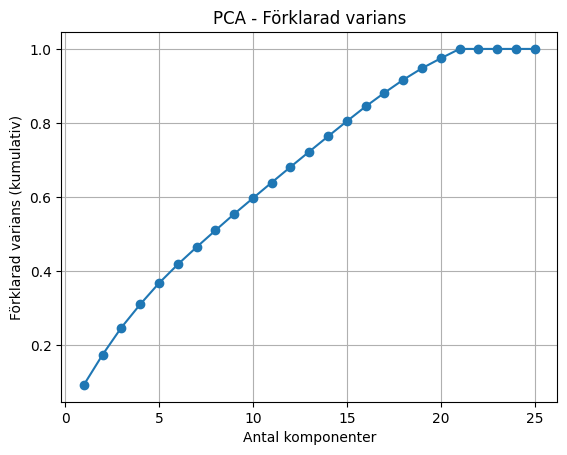

In [15]:
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Antal komponenter')
plt.ylabel('Förklarad varians (kumulativ)')
plt.title('PCA - Förklarad varians')
plt.grid(True)
plt.show()

PCA - Vad vi har gjort och vad vi ser i grafen
När vi använder PCA (Principal Component Analysis) vill vi förenkla vår data genom att minska antalet variabler (kolumner) — utan att förlora för mycket viktig information.

Innan PCA:

Vår ursprungliga dataset (salaries_encoded.csv) innehöll 25 variabler (kolumner).

Varje variabel beskriver något om data, till exempel jobbtitel, erfarenhetsnivå, företagsstorlek, osv.

Efter PCA:

PCA har skapat nya variabler, kallade huvudkomponenter (principal components).

Varje huvudkomponent är en kombination av de ursprungliga variablerna.

Komponenterna är ordnade så att den första komponenten fångar mest variation/information i datan, den andra komponenten näst mest, osv.

Vad grafen visar:

Grafen visar den kumulativa förklarade variansen — alltså hur mycket av datans information som vi fångar om vi behåller ett visst antal komponenter.

Vi ser att efter ungefär 20 komponenter fångar vi nästan 100% av datans variation.

Därför behöver vi inte använda alla 25 komponenter — det räcker att använda ungefär 20 komponenter för att behålla nästan all information.

Varför inte ta alla 25?

Syftet med PCA är att förenkla modellen och minska antalet variabler.

Genom att bara använda 20 komponenter:

Blir modeller snabbare och enklare.

Risken för överanpassning (overfitting) minskar.

Resultatet blir mer robust och lättare att tolka.

Slutsats: Vad vi prioriterar nu
✅ Vi vet att vår ursprungliga data hade 25 variabler.
✅ Vi ser att 20 komponenter räcker för att beskriva nästan all information.
✅ Framåt kan vi:

Använda de första 20 huvudkomponenterna istället för alla 25 kolumner.

Förenkla vår vidare analys eller modellering.



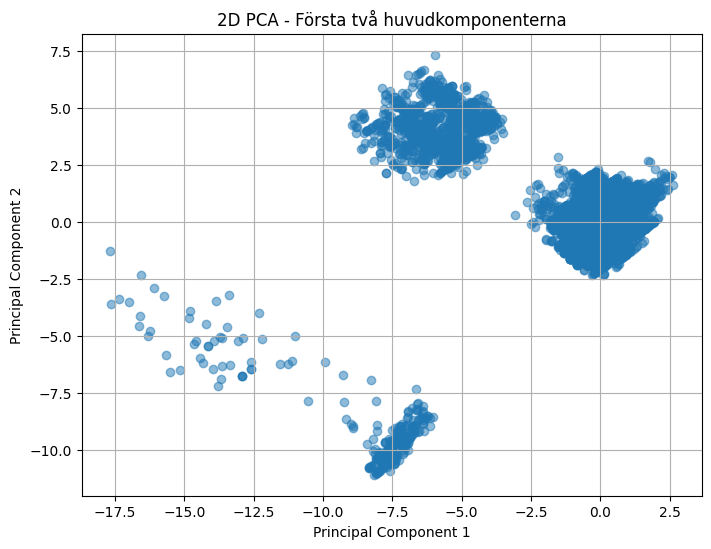

In [16]:
# Skapa en ny PCA med endast 2 komponenter
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(scaled_data)

# Skapa en DataFrame för enklare hantering
df_pca = pd.DataFrame(data=components_2d, columns=["PC1", "PC2"])

# Rita scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.title('2D PCA - Första två huvudkomponenterna')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

2D-visualisering av PCA-komponenter
För att ytterligare förenkla och visualisera vår data efter PCA har vi valt att plotta de två första huvudkomponenterna (Principal Component 1 och Principal Component 2) i en tvådimensionell scatter plot.

Vad visar den här plotten?
Varje punkt representerar en observation från vårt dataset (t.ex. en individ eller ett jobb i lönedata).

Istället för att visualisera alla ursprungliga 25 variabler, använder vi nu endast de två viktigaste komponenterna.

Principal Component 1 (PC1) fångar den största variationen i datan.

Principal Component 2 (PC2) fångar den näst största variationen i datan.

Genom att rita dessa två mot varandra kan vi få en överblick över hur våra datapunkter är spridda i ett förenklat rum.

Varför gör vi detta?
✅ För att minska komplexiteten i datan och ändå behålla så mycket information som möjligt.
✅ För att upptäcka mönster som kluster (grupperingar) eller avvikande observationer.
✅ För att kunna kommunicera och presentera en annars väldigt högdimensionell data på ett enkelt och visuellt sätt.

Sammanfattning
Vi har reducerat vår data från 25 ursprungliga variabler till två nya komponenter.

Trots denna stora förenkling, behåller dessa två komponenter en betydande del av datans struktur och variation.

Detta är ett effektivt sätt att utföra en första visuell analys och hitta eventuella intressanta mönster i vår datamängd.

Slutsats av 2D-PCA-visualiseringen
När vi visualiserar de två första huvudkomponenterna i en 2D-plot ser vi följande:

Datapunkterna är relativt utspridda, vilket visar att det finns en variation mellan observationerna.

Det verkar inte finnas några tydliga kluster (grupperingar) där observationerna skiljer sig mycket från varandra.

Detta tyder på att våra datapunkter representerar en ganska heterogen grupp — dvs. personerna eller jobben i datan skiljer sig från varandra på ett naturligt sätt.

Eftersom ingen tydlig gruppering finns, kan vi tolka det som att lönedata inom AI/ML-området har många faktorer som påverkar lönerna, utan att några enkla kategorier (grupper) kan urskiljas direkt i 2D.